### 配合課程影片 hmwu_StatR-10
### Exercise 10.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
spe = pd.read_csv('Data/DoubsSpe.csv', index_col = 0)
env = pd.read_csv('Data/DoubsEnv.csv', index_col = 0)
spa = pd.read_csv('Data/DoubsSpa.csv', index_col = 0)

In [3]:
def df_range(data):
    minimum, maximum = min(data.min()), max(data.max())
    return minimum, maximum

In [4]:
# 16/47
#找出spe資料集最大及最小值。
df_range(spe)

(0, 5)

In [5]:
ab = pd.value_counts(spe.values.flatten())

<BarContainer object of 6 artists>

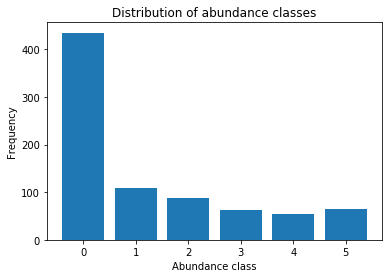

In [6]:
abundance_class = pd.value_counts(spe.values.flatten()).index
frequency = pd.value_counts(spe.values.flatten()).values
plt.title("Distribution of abundance classes")
plt.xlabel("Abundance class")
plt.ylabel("Frequency")
plt.bar(x = abundance_class, height = frequency)

In [7]:
#算出spe中，豐富度為0的總和。
print('spe中，豐富度為0的總和: {}'.format(ab.loc[0]))
#算出spe中，豐富度為0的總和的比例。
print('spe中，豐富度為0的總和的比例: {}'.format(ab.loc[0]/(spe.shape[0]*spe.shape[1])))

spe中，豐富度為0的總和: 435
spe中，豐富度為0的總和的比例: 0.5370370370370371


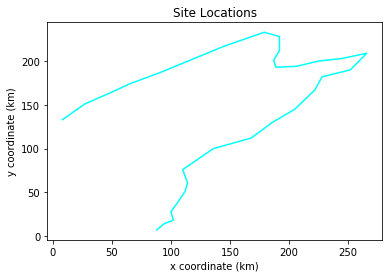

In [8]:
# 17/47
plt.title("Site Locations")
plt.xlabel("x coordinate (km)")
plt.ylabel("y coordinate (km)")
plt.plot(spa['x'], spa['y'], color = 'cyan');

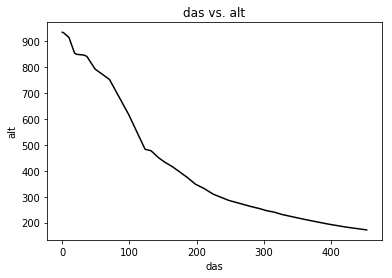

In [9]:
#請畫出env資料表中，das跟alt欄位的對應圖(x=das,y=alt)
plt.title("das vs. alt")
plt.xlabel("das")
plt.ylabel("alt")
plt.plot(env['das'], env['alt'], color = 'black');

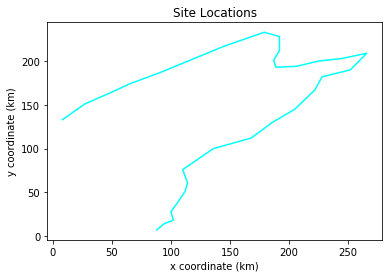

In [10]:
plt.title("Site Locations")
plt.xlabel("x coordinate (km)")
plt.ylabel("y coordinate (km)")
plt.plot(spa['x'], spa['y'], color = 'cyan');

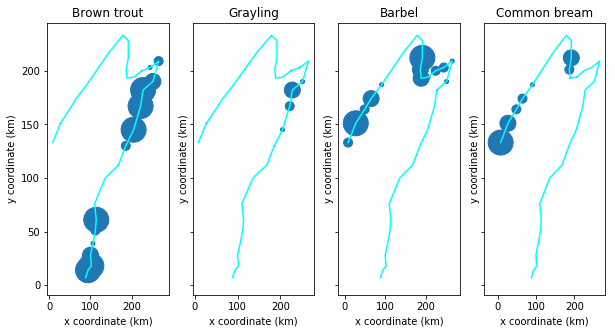

In [11]:
# 18/47
#了解其中參數s的應用，並請將spe資料中的"TRU","OMB","BAR","BCO"畫到圖上
xl = "x coordinate (km)"
yl = "y coordinate (km)"
title = ["Brown trout", "Grayling", "Barbel", "Common bream"]
spe_data = [spe['TRU'], spe['OMB'], spe['BAR'], spe['BCO']]
fig, ax = plt.subplots(nrows = 1, ncols = 4, sharey = True, figsize = (10, 5))

for i in range(4):
    ax[i].set_title(title[i])
    ax[i].plot(spa['x'], spa['y'], color = 'cyan')
    ax[i].scatter(spa['x'], spa['y'], s = spe_data[i]**4)
    ax[i].set_xlabel(xl)
    ax[i].set_ylabel(yl) 


In [12]:
# 19/47
#請計算spe中，各魚種在各地點的次數總和。
spe_pres = spe.astype(bool).sum(axis = 0)
spe_pres.sort_values()
spe_relf = 100*spe_pres/spe.shape[0]
spe_relf.round(1)

CHA    26.7
TRU    56.7
VAI    66.7
LOC    80.0
OMB    26.7
BLA    26.7
HOT    40.0
TOX    36.7
VAN    60.0
CHE    83.3
BAR    46.7
SPI    40.0
GOU    66.7
BRO    60.0
PER    50.0
BOU    36.7
PSO    43.3
ROT    36.7
CAR    40.0
TAN    56.7
BCO    30.0
PCH    23.3
GRE    40.0
GAR    60.0
BBO    33.3
ABL    46.7
ANG    36.7
dtype: float64

Text(0, 0.5, 'Number of species')

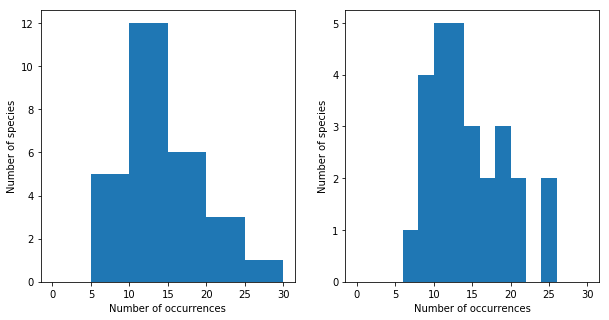

In [13]:
# 20/47
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

ax[0].hist(spe_pres, bins = 6, range = (0, 30))
ax[0].set_xlabel("Number of occurrences")
ax[0].set_ylabel("Number of species")
ax[1].hist(spe_pres, bins = 15, range = (0, 30))
ax[1].set_xlabel("Number of occurrences")
ax[1].set_ylabel("Number of species")

Text(0, 0.5, 'Number of species')

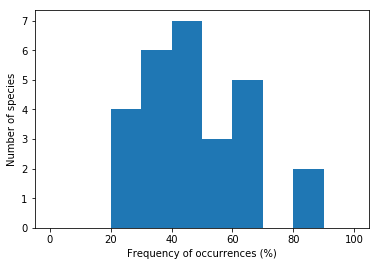

In [14]:
plt.hist(spe_relf, range = (0, 100))
plt.xlabel("Frequency of occurrences (%)")
plt.ylabel("Number of species")

In [15]:
# 21/47
sit_pres = spe.astype(bool).sum(axis = 1)
sit_pres.sort_values()

8      0
1      1
2      3
23     3
3      4
7      5
9      5
10     6
11     6
12     6
13     6
4      8
25     8
24     8
6     10
14    10
15    11
5     11
16    17
26    21
30    21
20    22
22    22
27    22
28    22
17    22
18    23
19    23
21    23
29    26
dtype: int64

In [16]:
sit_pres.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
           dtype='int64')

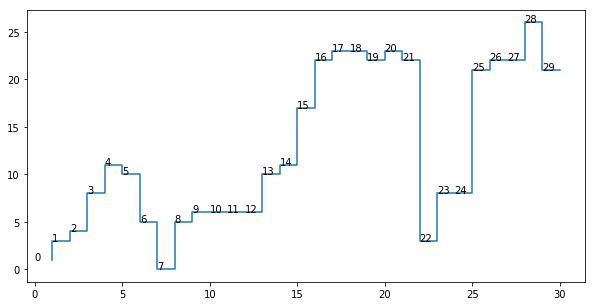

In [17]:
plt.figure(figsize = (10, 5))
plt.step(sit_pres.index, sit_pres.values)
# plt.text(sit_pres.index, sit_pres.values, s=[0]*30)
for i in range(30):
    plt.text(sit_pres.index[i]-1, sit_pres.values[i], s = i, fontsize = 10)
    

Text(0, 0.5, 'y coordinate (km)')

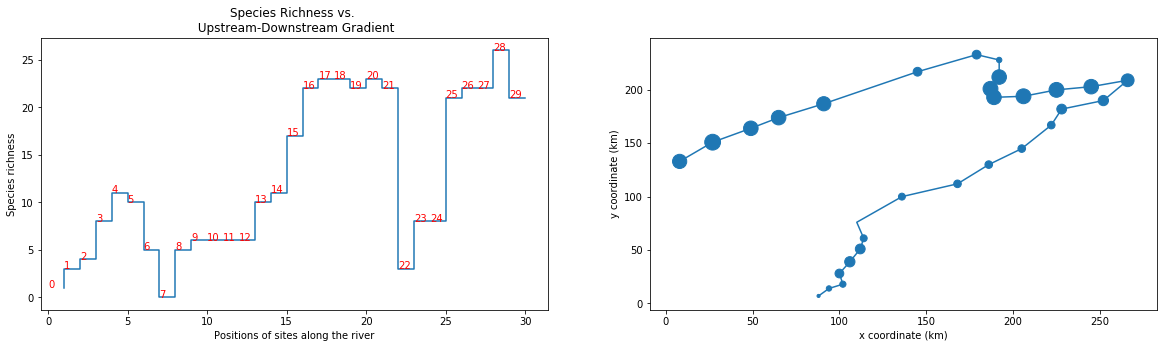

In [18]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
ax[0].step(sit_pres.index, sit_pres.values)
ax[0].set_title("Species Richness vs. \n Upstream-Downstream Gradient")
ax[0].set_xlabel("Positions of sites along the river")
ax[0].set_ylabel("Species richness")   
for i in range(30):
    ax[0].text(sit_pres.index[i]-1, sit_pres.values[i], s = i, fontsize = 10, color = 'red')
    
ax[1].plot(spa['x'], spa['y'])
ax[1].scatter(spa['x'], spa['y'], s = (5*sit_pres/sit_pres.max())*50)
ax[1].set_xlabel(xl)
ax[1].set_ylabel(yl)


In [19]:
# 24/47
#將資料轉為0(無)、1(有)。
       
spe.apply(lambda  x:x>0 if  1 else 0).iloc[0:5, 1:4]



,TRU,VAI,LOC
1,True,False,False
2,True,True,True
3,True,True,True
4,True,True,True
5,True,True,True


In [20]:
#利用函式decostand，將各魚種的欄位除上該欄位總合，算出相對豐富程度百分比。
from scipy import stats
spe.apply(lambda  x:x/x.sum()).iloc[0:5, 1:4]



,TRU,VAI,LOC
1,0.052632,0.000000,0.000000
2,0.087719,0.058824,0.041096
3,0.087719,0.073529,0.068493
4,0.070175,0.073529,0.068493
5,0.035088,0.044118,0.027397


In [21]:
spe_sum = spe.apply(lambda  x:x/x.sum())
spe_sum.apply(lambda  x:x.sum())

CHA    1.0
TRU    1.0
VAI    1.0
LOC    1.0
OMB    1.0
BLA    1.0
HOT    1.0
TOX    1.0
VAN    1.0
CHE    1.0
BAR    1.0
SPI    1.0
GOU    1.0
BRO    1.0
PER    1.0
BOU    1.0
PSO    1.0
ROT    1.0
CAR    1.0
TAN    1.0
BCO    1.0
PCH    1.0
GRE    1.0
GAR    1.0
BBO    1.0
ABL    1.0
ANG    1.0
dtype: float64

In [22]:
# 26/47
#利用函式decostand，將每個觀測站(1-30)除以每個觀測站的(每行)總合，算出該觀測站各魚種的豐富程度百分比。
spe.apply(lambda  x:x/x.sum(), axis = 1).iloc[0:5, 1:4]



,TRU,VAI,LOC
1,1.000000,0.000000,0.000000
2,0.416667,0.333333,0.250000
3,0.312500,0.312500,0.312500
4,0.190476,0.238095,0.238095
5,0.058824,0.088235,0.058824


In [23]:
spe_rel = spe.apply(lambda  x:x/x.sum(), axis = 0)
spe_rel.apply(lambda  x:x.sum())

CHA    1.0
TRU    1.0
VAI    1.0
LOC    1.0
OMB    1.0
BLA    1.0
HOT    1.0
TOX    1.0
VAN    1.0
CHE    1.0
BAR    1.0
SPI    1.0
GOU    1.0
BRO    1.0
PER    1.0
BOU    1.0
PSO    1.0
ROT    1.0
CAR    1.0
TAN    1.0
BCO    1.0
PCH    1.0
GRE    1.0
GAR    1.0
BBO    1.0
ABL    1.0
ANG    1.0
dtype: float64

In [24]:
# 27/47
spe_hel = spe.apply(lambda  x:x.sum(), axis = 1)
spe.apply(lambda x:(x/spe_hel)**0.5, axis = 0).iloc[0:5, 1:4]





,TRU,VAI,LOC
1,1.000000,0.000000,0.000000
2,0.645497,0.577350,0.500000
3,0.559017,0.559017,0.559017
4,0.436436,0.487950,0.487950
5,0.242536,0.297044,0.242536


In [25]:
spe_hel = spe.apply(lambda  x: x/x.sum(), axis = 1)
spe_hel.apply(lambda  x:x**0.5).iloc[0:5, 1:4]

,TRU,VAI,LOC
1,1.000000,0.000000,0.000000
2,0.645497,0.577350,0.500000
3,0.559017,0.559017,0.559017
4,0.436436,0.487950,0.487950
5,0.242536,0.297044,0.242536


In [26]:
# 28/47

from scipy.stats import chisquare

spe = spe.fillna(0)
total_sum = []
spe_fill0 = spe.apply(lambda  x: np.sum(x), axis = 1)
for i in range(1,31):
    total_sum.append(spe_fill0[i])

total_sum = np.sum(total_sum)
total_sum_sqrt = total_sum**0.5
col_sum = spe.apply(lambda  x: x.sum()**0.5, axis = 0)
row_sum = spe.apply(lambda  x: x.sum(), axis = 1)
chi = spe.apply(lambda  x: x/row_sum, axis = 0)
chi = chi.apply(lambda  x: total_sum_sqrt*x/col_sum, axis = 1)
chi.iloc[0:5, 1:4]




,TRU,VAI,LOC
1,4.196908,0.000000,0.000000
2,1.748712,1.280829,0.927140
3,1.311534,1.200777,1.158925
4,0.799411,0.914878,0.882991
5,0.246877,0.339043,0.218151


In [27]:
spe = spe.fillna(0)
row_max = spe.apply(lambda  x: x.max(), axis = 0)
wis = spe.apply(lambda  x: x/row_max, axis = 1)
wis = wis.apply(lambda  x: x/x.sum(), axis = 1)
wis.iloc[0:5, 1:4]


,TRU,VAI,LOC
1,1.000000,0.000000,0.000000
2,0.416667,0.333333,0.250000
3,0.312500,0.312500,0.312500
4,0.190476,0.238095,0.238095
5,0.058824,0.088235,0.058824


/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


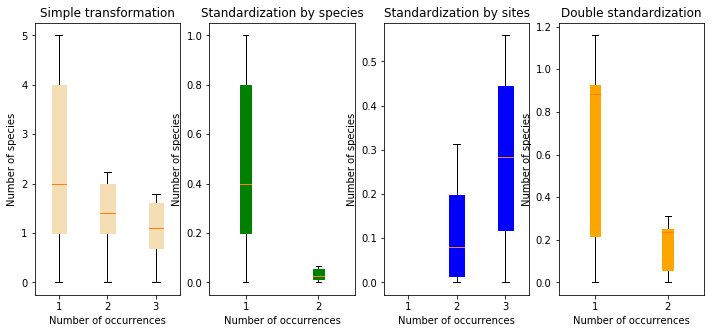

In [28]:
# 29/47
#將上述各種轉換方式畫成boxplot。

import math
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (12, 5))

spe_max = spe.apply(lambda  x:x/x.max())
spe_max = spe_max.fillna(0)

spe_relsp = spe.apply(lambda  x:x/x.sum(), axis = 0)
spe_relsp = spe_relsp.fillna(0)

spe_rel = spe.apply(lambda  x:x/x.sum(), axis = 1)
spe_rel = spe_rel.fillna(0)

spe_norm = spe.apply(lambda  x:x/x.sum(), axis = 1)
spe_norm = spe_norm.apply(lambda x:x**0.5)
spe_norm = spe_norm.fillna(0)

spe_hel = spe_hel.fillna(0)
spe_hel = spe.apply(lambda  x: x/x.sum(), axis = 1)
spe_hel.apply(lambda  x:x**0.5)

spe_loc_log1p = spe['LOC'].apply(lambda  x:math.log1p(x))
spe_sqrt = spe.apply(lambda  x:x**0.5)

spe_chi = chi.iloc[0:5, 1:4]
spe_wis = wis.iloc[0:5, 1:4]



ax0 = pd.DataFrame([spe['LOC'], spe_sqrt['LOC'], spe_loc_log1p])
ax1 = pd.DataFrame([spe_max['LOC'], spe_relsp['LOC']])
ax2 = pd.DataFrame([spe_hel['LOC'], spe_rel['LOC'], spe_norm['LOC']])
ax3 = pd.DataFrame([spe_chi['LOC'], spe_wis['LOC']])

data_set_title = ['Simple transformation', 'Standardization by species', 'Standardization by sites', 'Double standardization']
data_boxpolt = [ax0, ax1, ax2, ax3]
colors =['wheat', 'green', 'blue', 'orange']


for i in range(4):
    ax[i].set_title(data_set_title[i])
    ax_set = ax[i].boxplot(data_boxpolt[i], patch_artist = True)
    ax[i].set_xlabel("Number of occurrences")
    ax[i].set_ylabel("Number of species")
    plt.setp(ax_set['boxes'], color = colors[i])



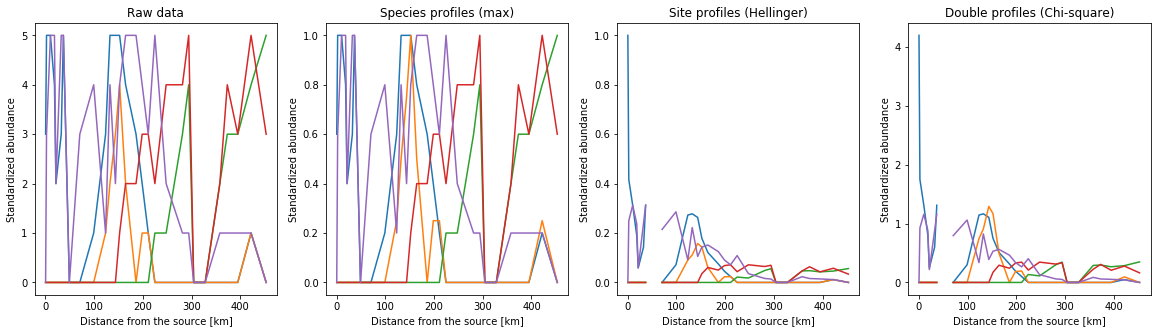

In [29]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))

spe_sqrt = spe.apply(lambda  x:x**0.5)
#spe_log1p = spe['LOC'].apply(lambda  x:math.log(x,10))

d = {}
data_set = [spe, spe_max, spe_hel, chi]
data_set_meta = ['TRU', 'OMB', 'BCO', 'BAR', 'LOC']
data_set_title = ['Raw data', 'Species profiles (max)', 'Site profiles (Hellinger)', 'Double profiles (Chi-square)', 'Double profiles (Chi-square)']


for i in range(4):
    for j in range(5):
        ax[i].plot(env['das'], data_set[i][data_set_meta[j]])
        ax[i].set_xlabel('Distance from the source [km]')
        ax[i].set_ylabel('Standardized abundance')
        ax[i].set_title(data_set_title[i])



# ax[2].plot(env['das'], spe_hel['TRU'],)
# ax[2].plot(env['das'], spe_hel['OMB'],)
# ax[2].plot(env['das'], spe_hel['BCO'])
# ax[2].plot(env['das'], spe_hel['BAR'])
# ax[2].plot(env['das'], spe_hel['LOC'])




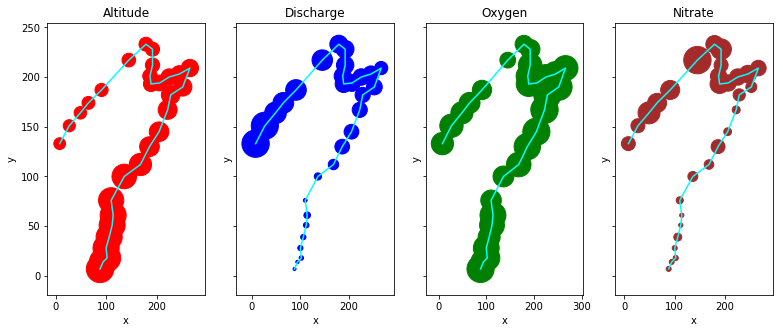

In [30]:
# 32/47
#將環境變數一起視覺化出來(海拔、水道大小、溶氧量等等。)


fig, ax = plt.subplots(nrows = 1, ncols = 4, sharey = True, figsize = (13, 5))
env_alt = env['alt']
env_deb = env['deb']
env_oxy = env['oxy']
env_nit = env['nit']

env_data = [env['alt'], env['deb'], env['oxy'], env['nit']]
env_color = ['red', 'blue', 'green', 'brown']
env_main = ['Altitude', 'Discharge', 'Oxygen', 'Nitrate']

for i in range(4):
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].set_title(env_main[i])
    ax[i].plot(spa['x'], spa['y'], color = 'cyan')
    ax[i].scatter(spa['x'], spa['y'], s = (5*env_data[i]/env_data[i].max())*150, color = env_color[i])



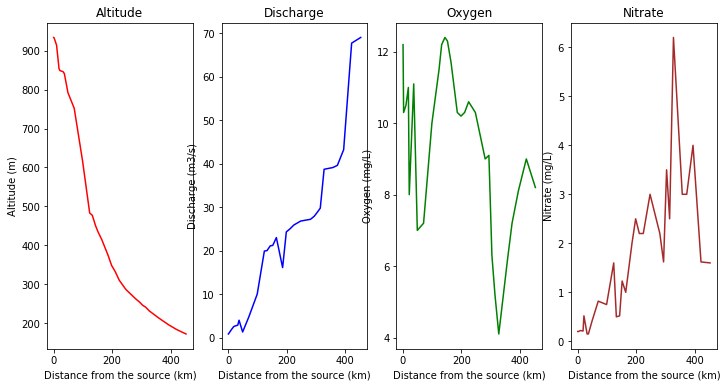

In [31]:
# 33/47
#將剛才幾個環境變數畫成線圖，藉由探索，是否能解釋上下游的一些關係？

fig, ax = plt.subplots(nrows = 1, ncols = 4, sharey = True, figsize = (12, 6))

plt.subplot(141)
plt.title("Altitude")
plt.xlabel('Distance from the source (km)')
plt.ylabel('Altitude (m)')
plt.plot(env['das'], env['alt'], color = 'red')

plt.subplot(142)
plt.title("Discharge")
plt.xlabel('Distance from the source (km)')
plt.ylabel('Discharge (m3/s)')
plt.plot(env['das'], env['deb'], color = 'blue')

plt.subplot(143)
plt.title("Oxygen")
plt.xlabel('Distance from the source (km)')
plt.ylabel('Oxygen (mg/L)')
plt.plot(env['das'], env['oxy'], color = 'green')

plt.subplot(144)
plt.title("Nitrate")
plt.xlabel('Distance from the source (km)')
plt.ylabel('Nitrate (mg/L)')
plt.plot(env['das'], env['nit'], color = 'brown')


/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


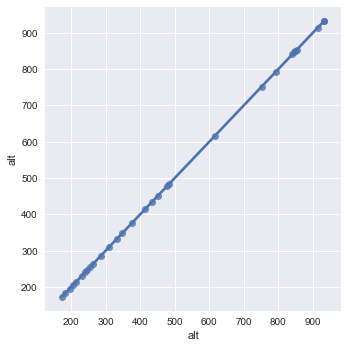

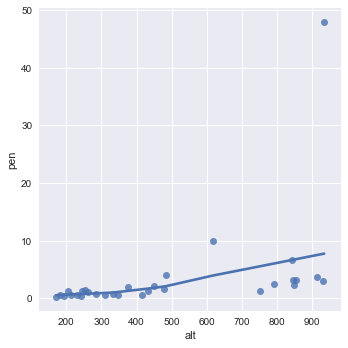

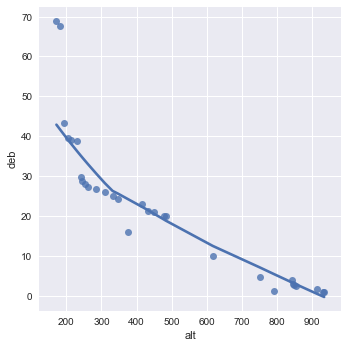

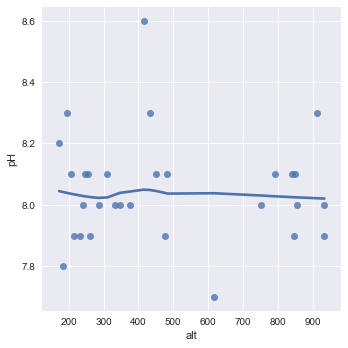

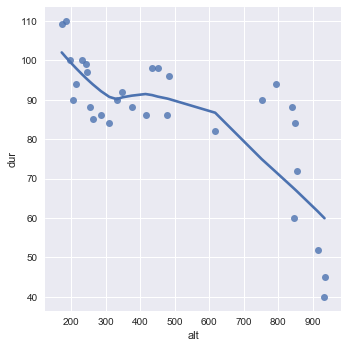

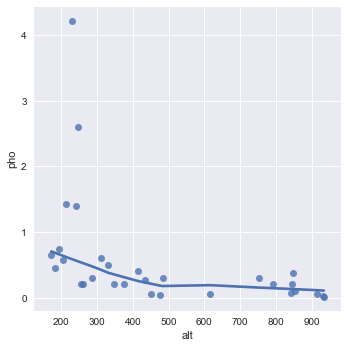

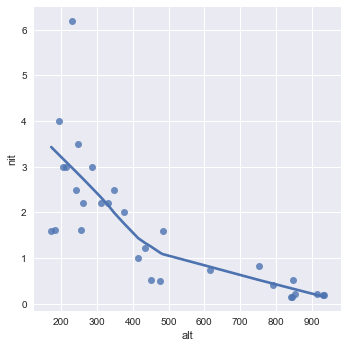

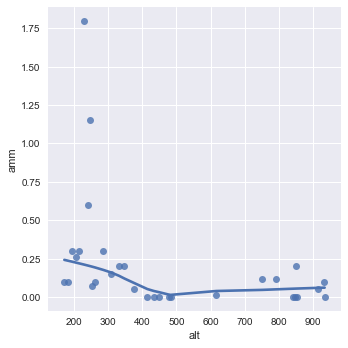

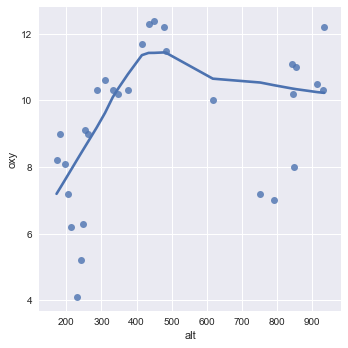

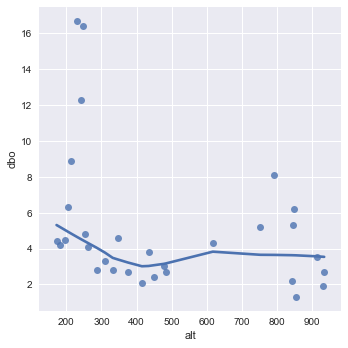

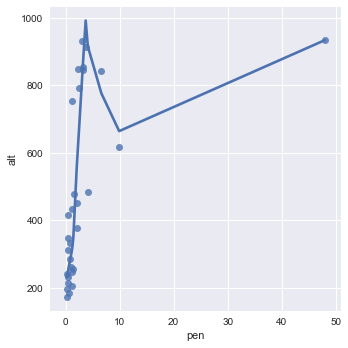

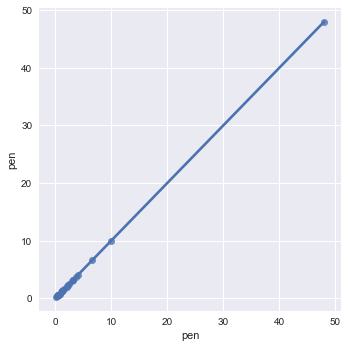

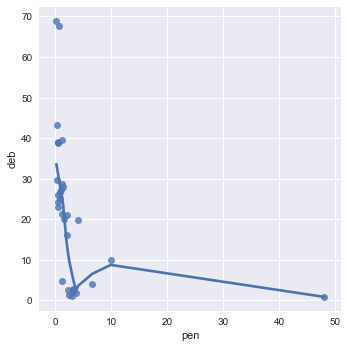

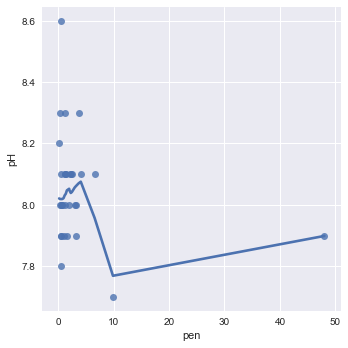

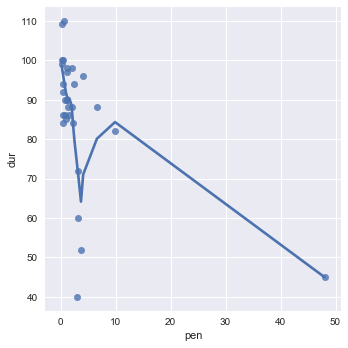

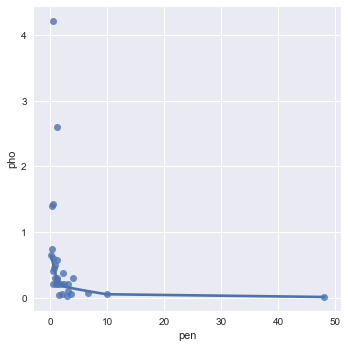

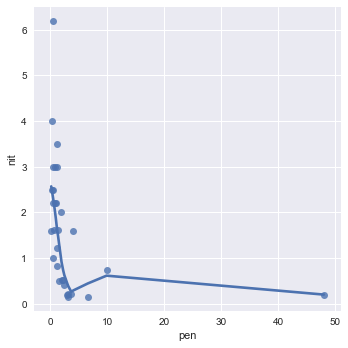

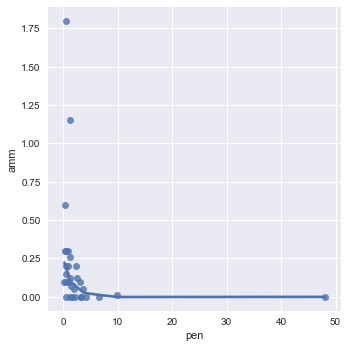

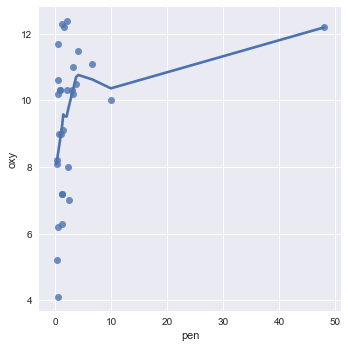

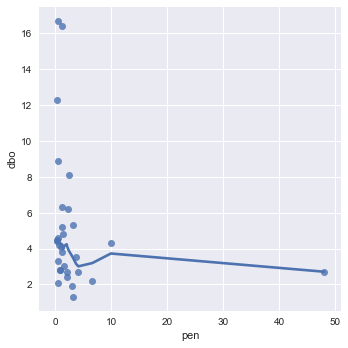

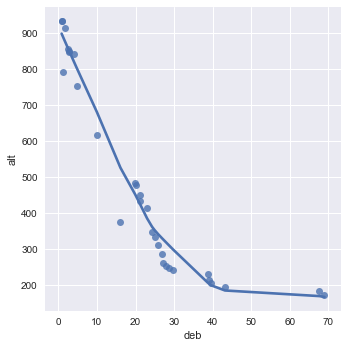

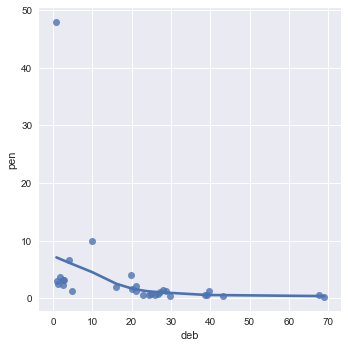

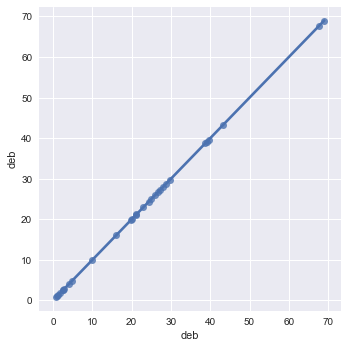

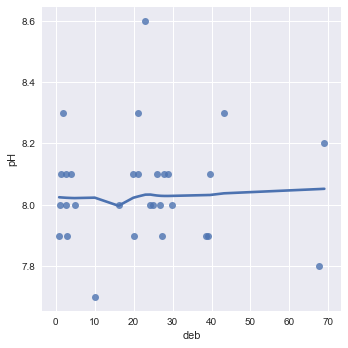

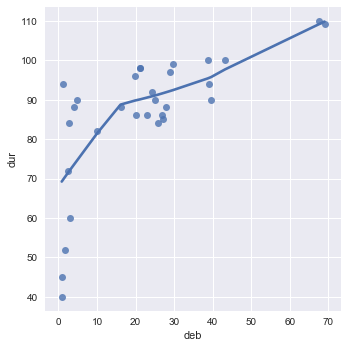

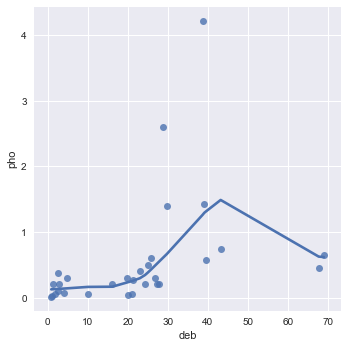

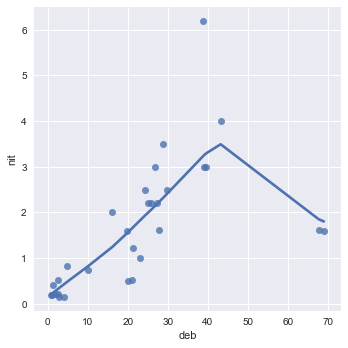

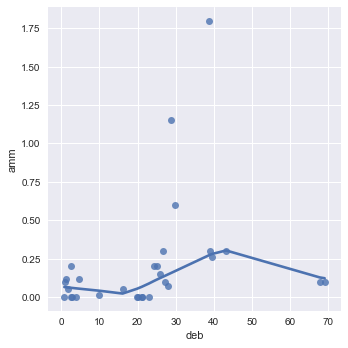

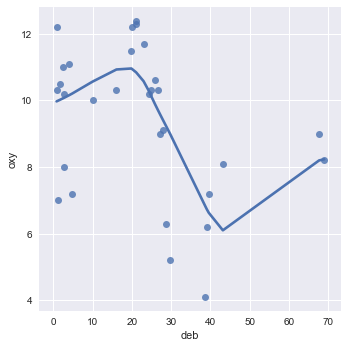

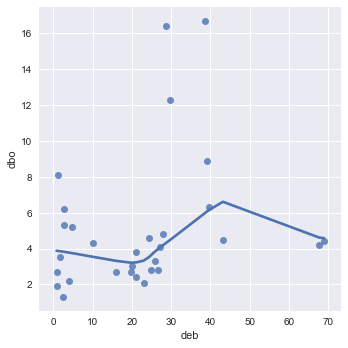

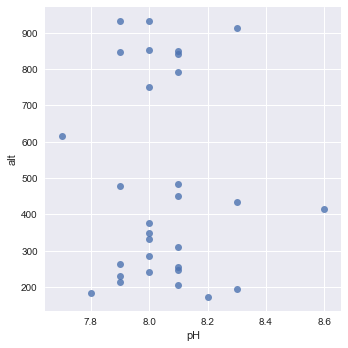

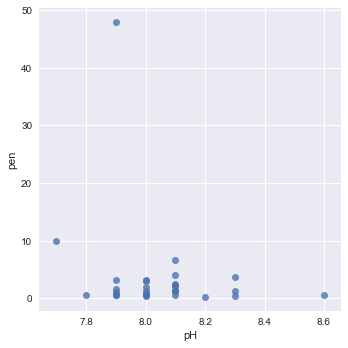

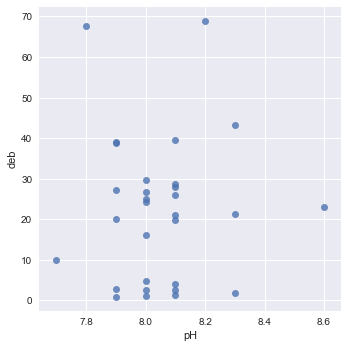

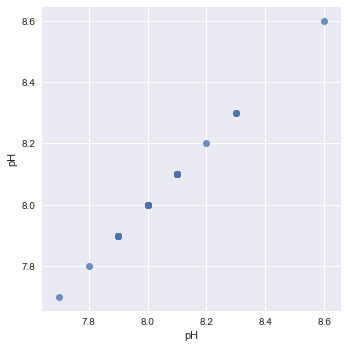

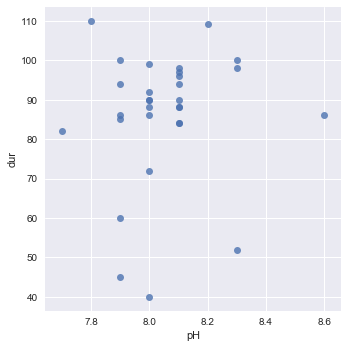

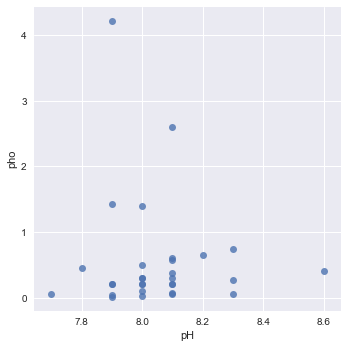

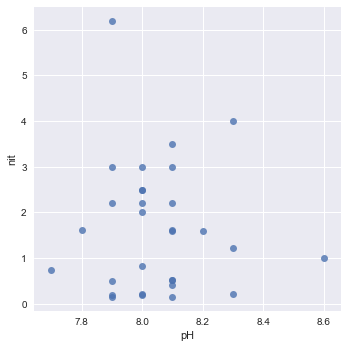

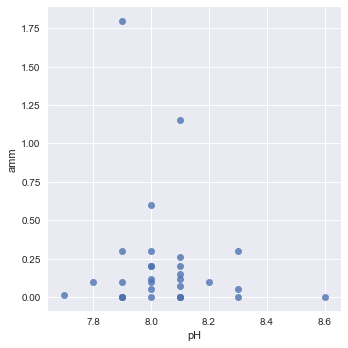

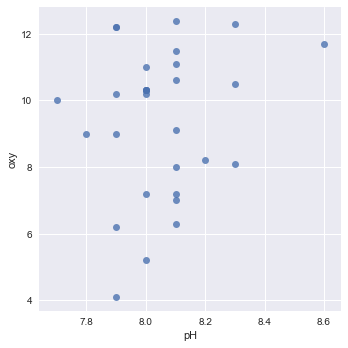

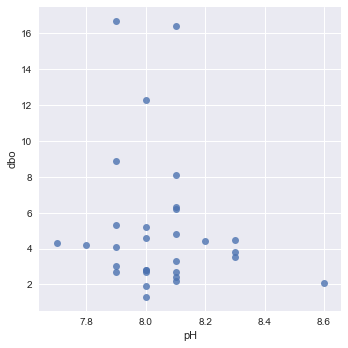

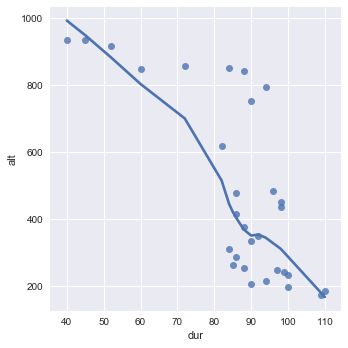

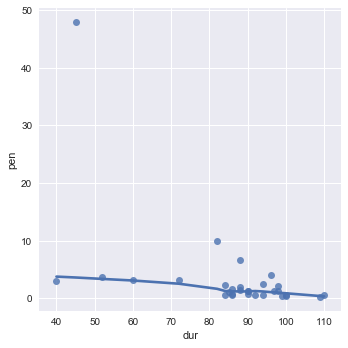

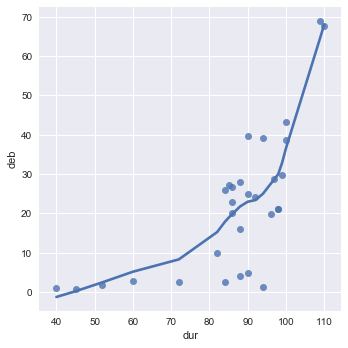

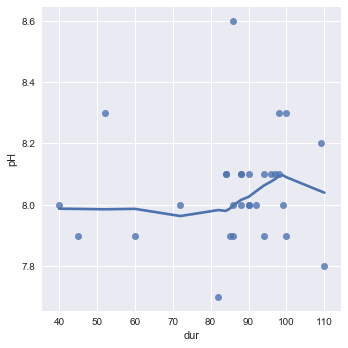

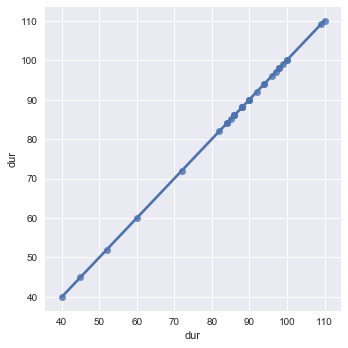

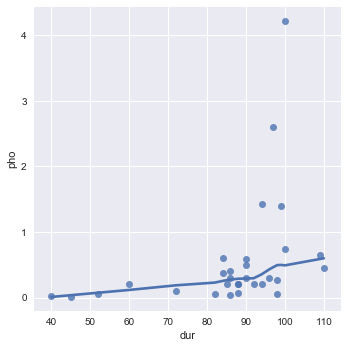

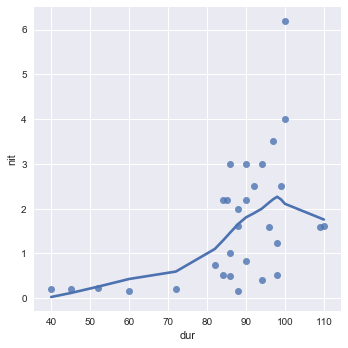

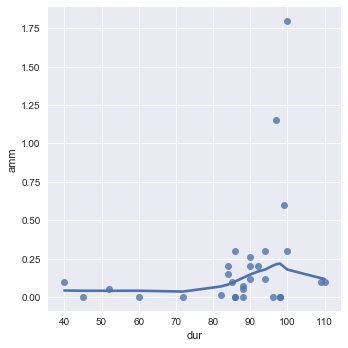

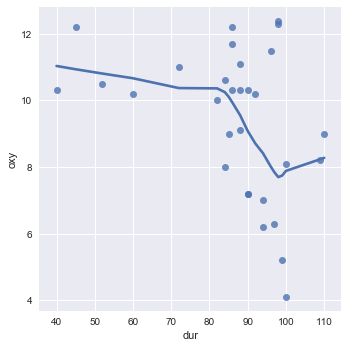

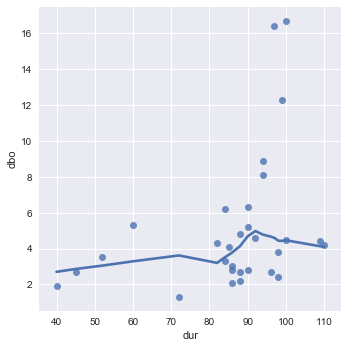

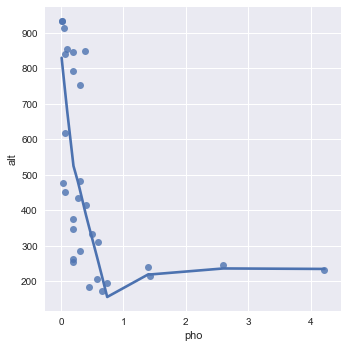

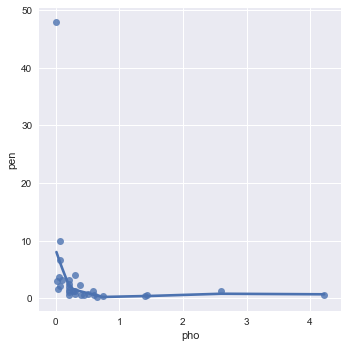

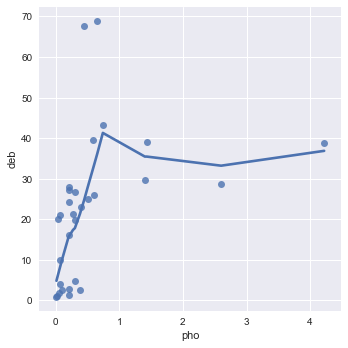

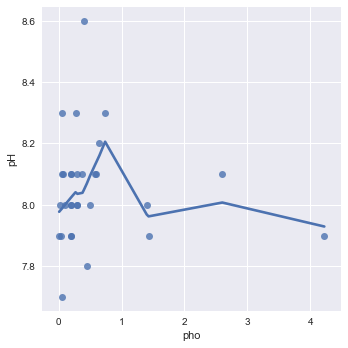

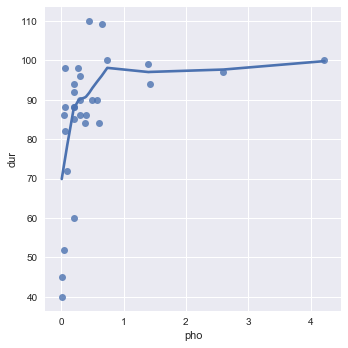

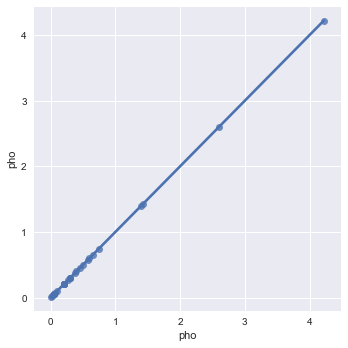

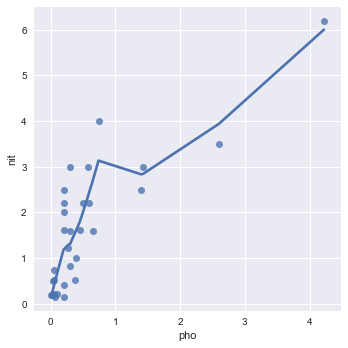

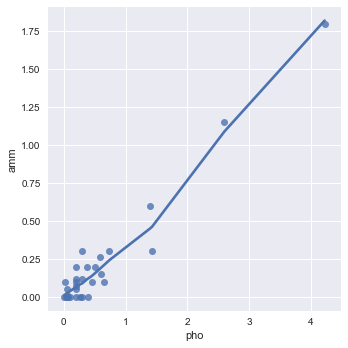

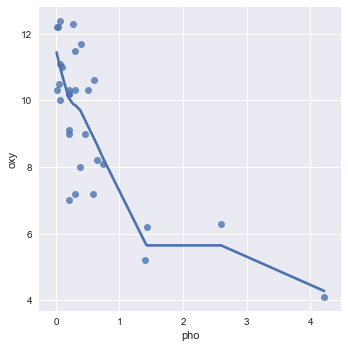

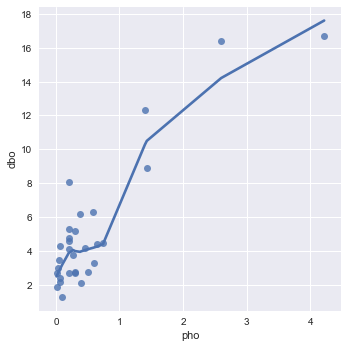

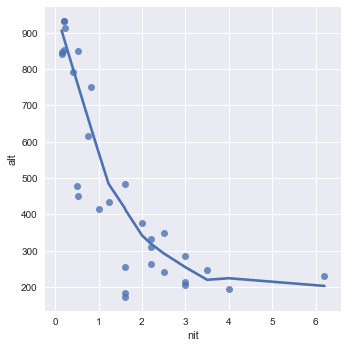

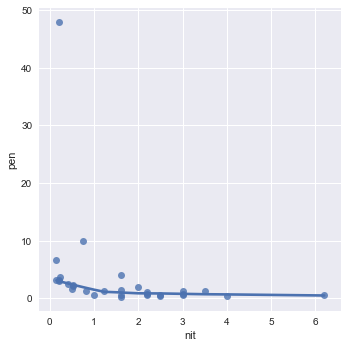

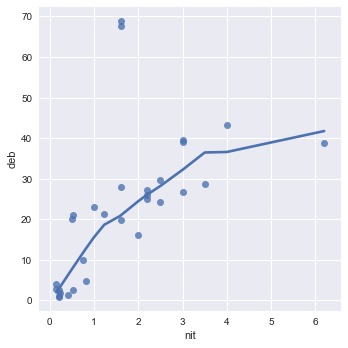

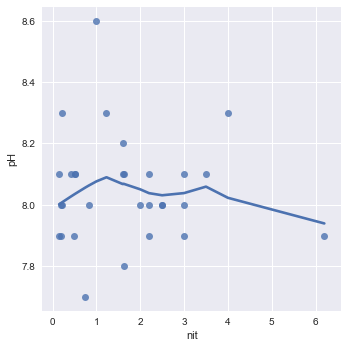

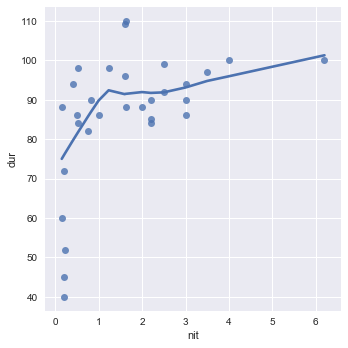

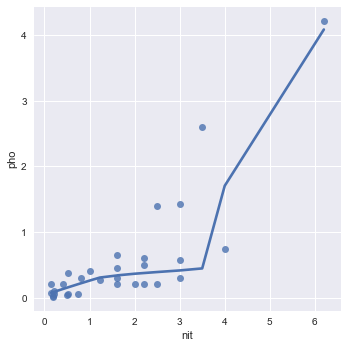

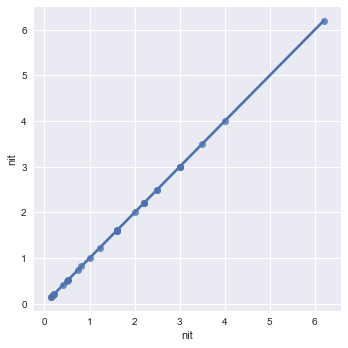

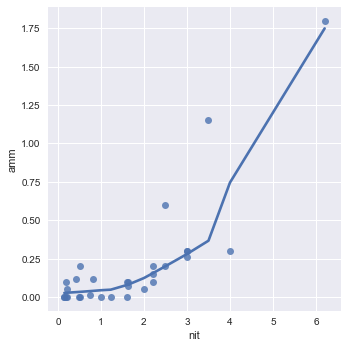

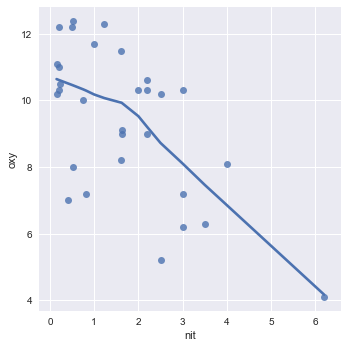

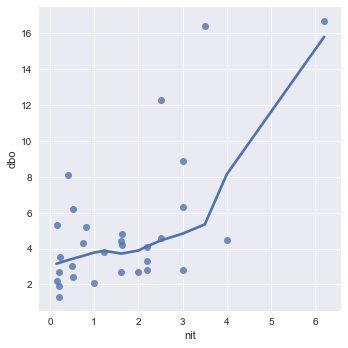

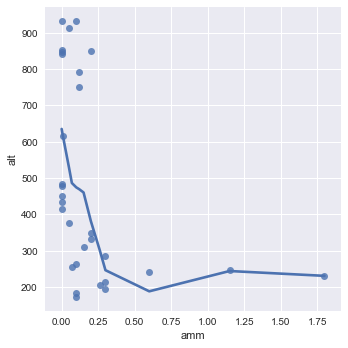

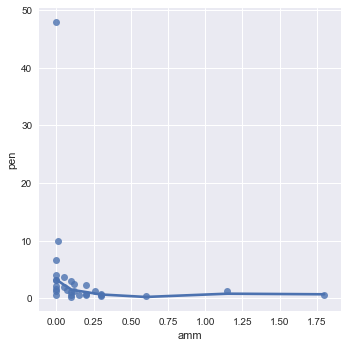

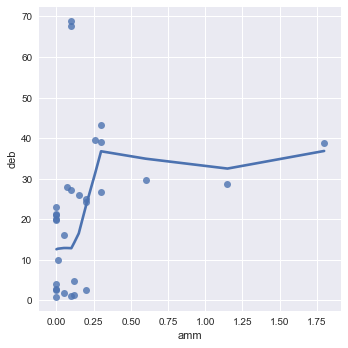

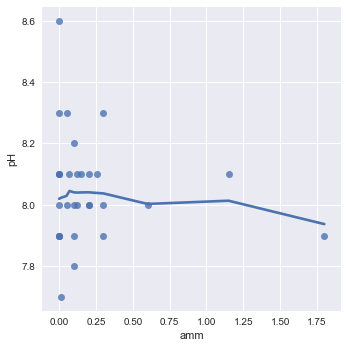

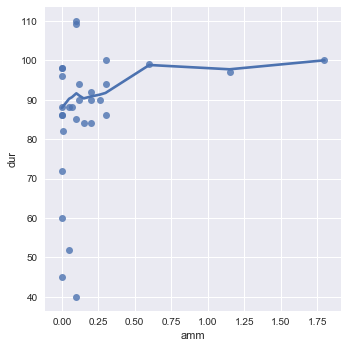

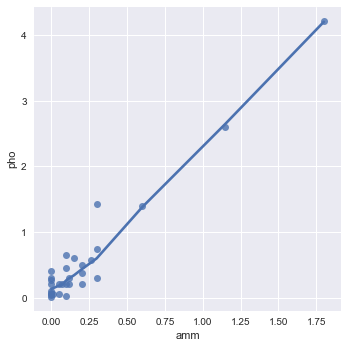

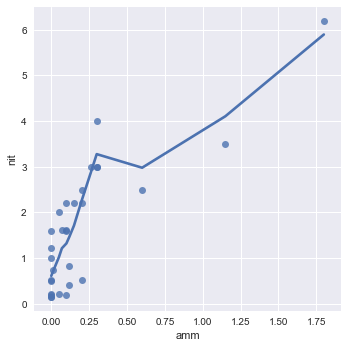

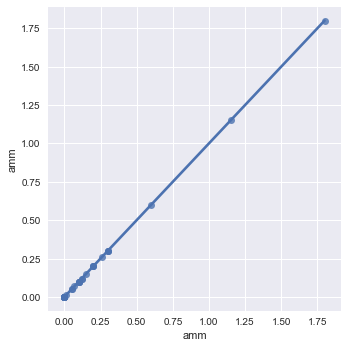

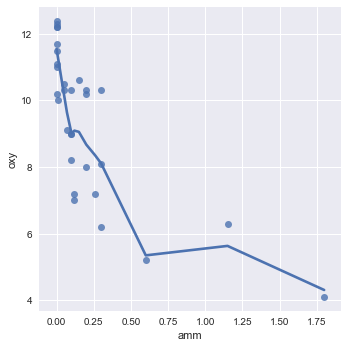

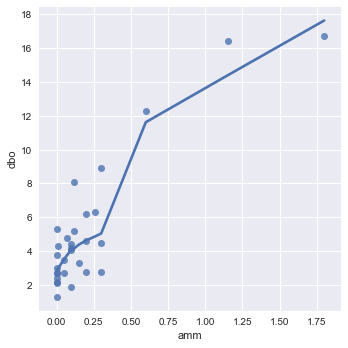

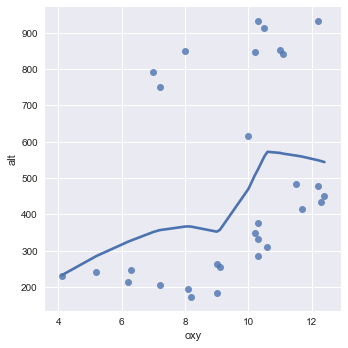

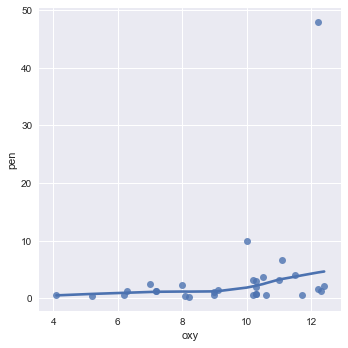

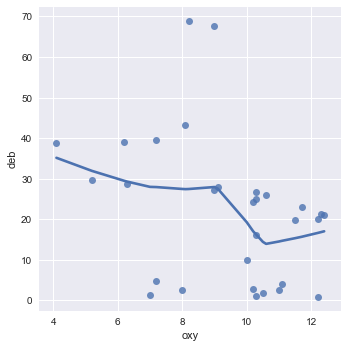

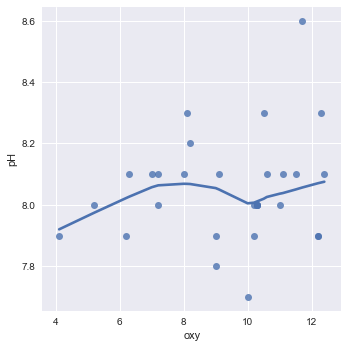

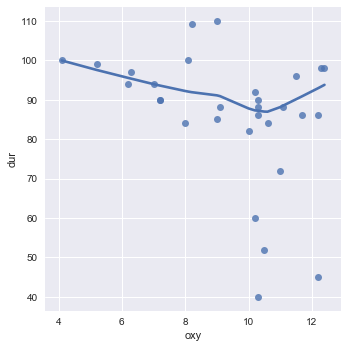

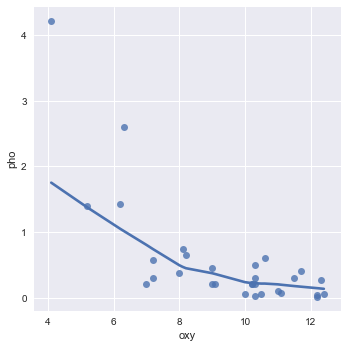

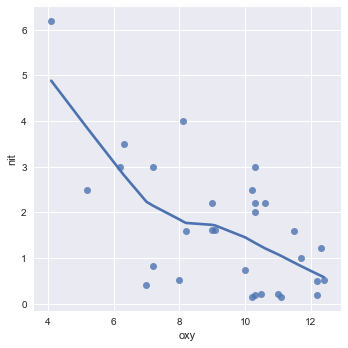

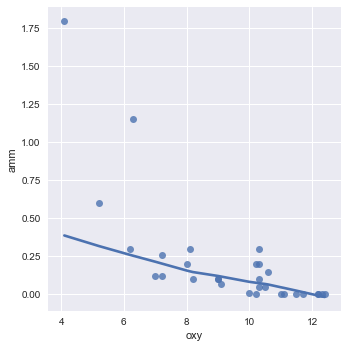

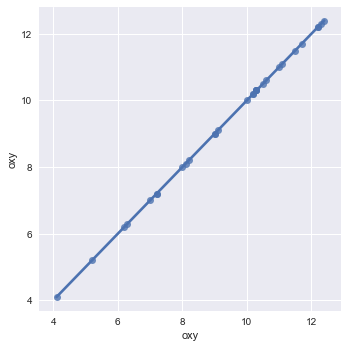

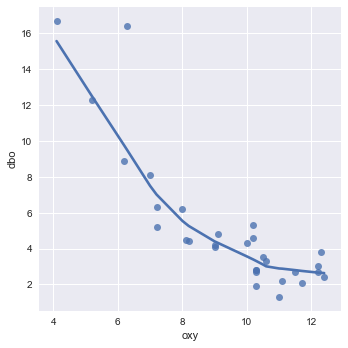

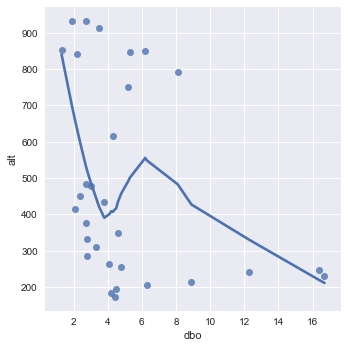

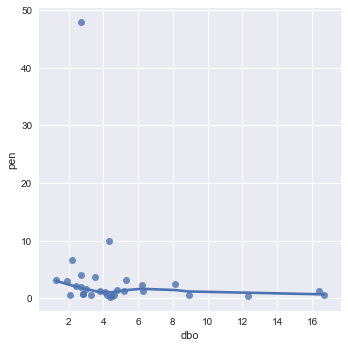

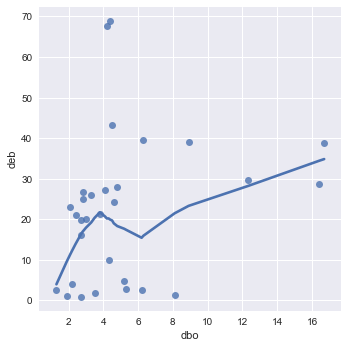

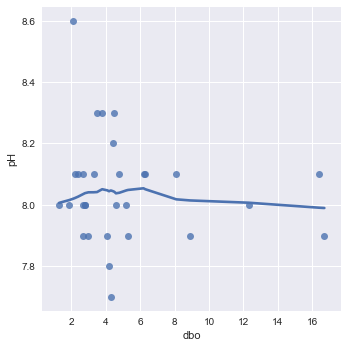

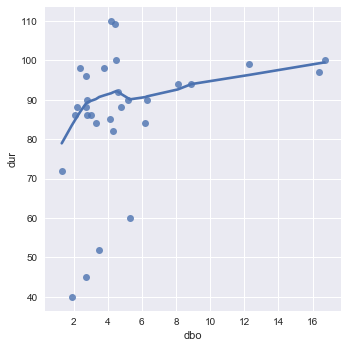

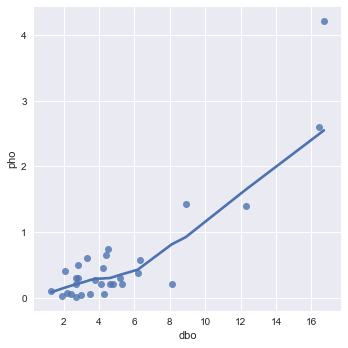

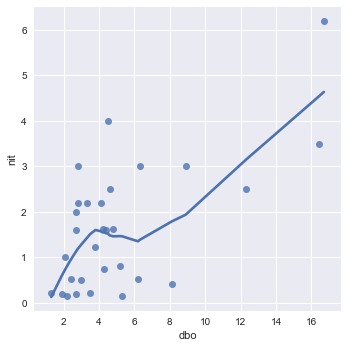

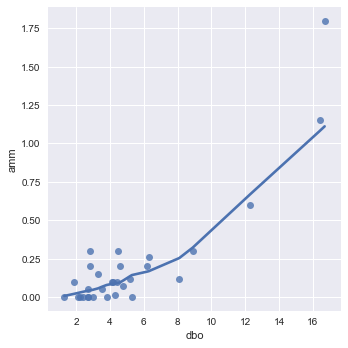

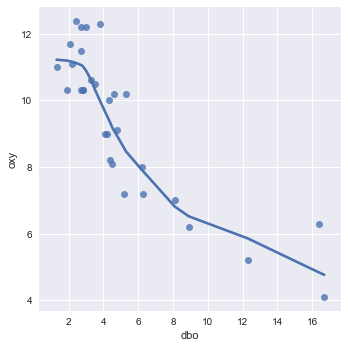

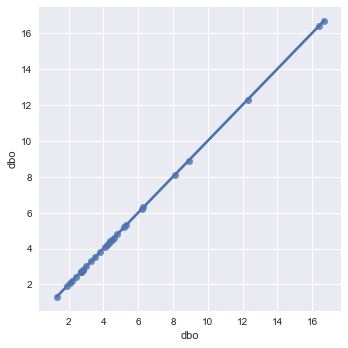

In [32]:
# 34/47
#畫出各個環境變數彼此之間的散佈圖。

import matplotlib.pyplot as plt 
import seaborn as sns


# axes = pd.tools.plotting.scatter_matrix(env, alpha = 0.2, figsize = (10, 6))
# plt.tight_layout()

#sns.pairplot(env, kind = "reg")


#sns.lmplot(x = "das", y = "alt", data = env, lowess = True)

len(env.columns)

for i in range(1, len(env.columns)):
    for j in range(1, len(env.columns)):
        sns.lmplot(x = env.columns[i], y = env.columns[j], data = env, lowess = True)

#sns.lmplot(data = env, lowess = True);


{'whiskers': [<matplotlib.lines.Line2D at 0x13681f278>,
 'caps': [<matplotlib.lines.Line2D at 0x13681f780>,
 'boxes': [<matplotlib.patches.PathPatch at 0x136815fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x13681fe80>],
 'fliers': [<matplotlib.lines.Line2D at 0x136829240>],
 'means': []}

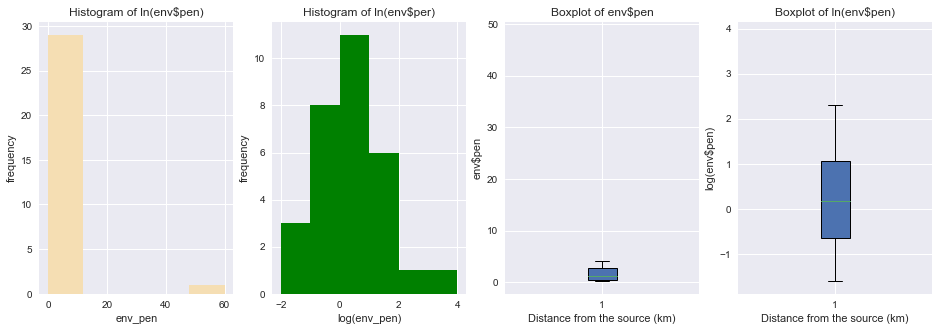

In [33]:
# 35/47
#由於pen中有離群值，對該變數做一些簡單的視覺化分析

import math
env_pen = env['pen']
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 5))


plt.subplot(141)
plt.title("Histogram of ln(env$pen)")
plt.xlabel('env_pen')
plt.ylabel('frequency')
plt.hist(env_pen, bins = 5, range = (0, 60), color = 'wheat')


plt.subplot(142)
plt.title("Histogram of ln(env$per)")
plt.xlabel('log(env_pen)')
plt.ylabel('frequency')
plt.hist(env_pen.apply(lambda  x:math.log(x)), bins = 6, range = (-2, 4), color = 'green')


plt.subplot(143)
plt.title("Boxplot of env$pen")
plt.xlabel('Distance from the source (km)')
plt.ylabel('env$pen')
plt.boxplot(env_pen, patch_artist = True)


plt.subplot(144)
plt.title("Boxplot of ln(env$pen)")
plt.xlabel('Distance from the source (km)')
plt.ylabel('log(env$pen)')
plt.boxplot(env_pen.apply(lambda  x:math.log(x)), patch_artist = True)

In [34]:
# 36/47
#對每個變數做標準化。

########################有誤差

from scipy import stats

env = pd.read_csv('Data/DoubsEnv.csv', index_col = 0)
env_zscore= env.apply(lambda  x:stats.zscore(x), axis = 0)
env_zscore.apply(lambda  x:np.mean(x), axis = 0)

das   -1.332268e-16
alt    0.000000e+00
pen   -8.141636e-17
deb   -3.700743e-16
pH    -4.204045e-15
dur    2.664535e-16
pho    1.905883e-16
nit   -7.308968e-17
amm    1.554312e-16
oxy    5.847175e-16
dbo    3.330669e-17
dtype: float64

In [35]:
env_zscore.apply(lambda  x:np.std(x), axis = 0)

das    1.0
alt    1.0
pen    1.0
deb    1.0
pH     1.0
dur    1.0
pho    1.0
nit    1.0
amm    1.0
oxy    1.0
dbo    1.0
dtype: float64